In [1]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
# Paso 1: Preprocesamiento de datos (ejemplo básico)
# Supongamos que tenemos la siguiente serie de tiempo prueba
time_series = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]) 
print("time_series: ",time_series)
train_size = int(len(time_series) * 0.6) # Tamaño del conjunto de entrenamiento 
train_data, test_data = time_series[:train_size], time_series[train_size:]
print("train_data:", train_data) 
print("test_data",test_data)

time_series:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
train_data: [1 2 3 4 5 6 7 8 9]
test_data [10 11 12 13 14 15]


In [2]:

# Paso 2: Preparación de datos (ejemplo básico)
# Por ejemplo, transformamos nuestros datos en secuencias 

def create_dataset(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length): 
        X.append(data[i:i + seq_length]) 
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Definimos el número de pasos de tiempo para la serie temporal
seq_length = 4

#Creamos conjuntos de entrenamiento y prueba en formato 3D 
X_train, y_train = create_dataset(train_data, seq_length) 
X_test, y_test = create_dataset(test_data, seq_length)

# Imprimimos los conjuntos de datos en formato 3D 
print("Conjunto de secuencias de entrenamiento:\n", X_train) 
print("Etiquetas de entrenamiento:\n", y_train) 
print("Conjunto de secuencias de prueba:\n", X_test) 
print("Etiquetas de prueba: \n", y_test)

Conjunto de secuencias de entrenamiento:
 [[1 2 3 4]
 [2 3 4 5]
 [3 4 5 6]
 [4 5 6 7]
 [5 6 7 8]]
Etiquetas de entrenamiento:
 [5 6 7 8 9]
Conjunto de secuencias de prueba:
 [[10 11 12 13]
 [11 12 13 14]]
Etiquetas de prueba: 
 [14 15]


In [3]:

# Paso 3: Construcción del modelo
model = Sequential()
model.add(SimpleRNN(16, activation='relu', input_shape=(seq_length, 1))) 
model.add(Dense(1))
# Paso 4: Compilacion del modelo
model.compile(optimizer='adam', loss='mse') # Compilación del modelo

c:\Users\jaime\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 102.4521
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 100.2431
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 98.0744
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 95.9460
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 93.8578
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 91.8098
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 89.8017
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 87.8334
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 85.9045
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 84.0146
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 82.1633
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 80.3501
Epoch 13/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 78.5743
Epoch 14/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 76.8355
Epoch 15/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 75.1328
Epo

<Axes: >

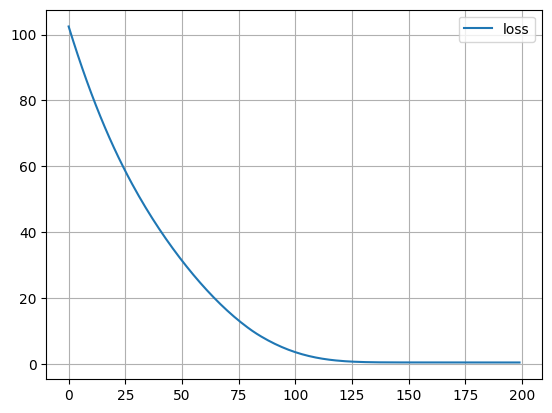

In [4]:

#Paso 5: Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=200)
# Paso 6: Graficar el historial de entrenamiento: 
pd.DataFrame(history.history).plot(grid=True)

In [5]:

# Paso 7: Evaluación del modelo
Evaluación = model.evaluate(X_test, y_test)
print(Evaluación)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step - loss: 10.0596
10.059648513793945


In [6]:

# Paso 8: Predicción 
print("X_test: \n",X_test) 
print("y_test: \n",y_test) 
y_pred = model.predict(X_test) 
print("y_pred: \n",y_pred)

X_test: 
 [[10 11 12 13]
 [11 12 13 14]]
y_test: 
 [14 15]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
y_pred: 
 [[16.939365]
 [18.388132]]


In [16]:

from keras.models import Sequential 
from keras.layers import LSTM, Dense 
import numpy as np
import matplotlib.pyplot as plt

# Paso 1: Preprocesamiento de datos (ejemplo básico)
# Supongamos que tenemos la siguiente serie de tiempo prueba
time_series = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]) 
print("time_series: ",time_series)
train_size = int(len(time_series) * 0.6) # Tamaño del conjunto de entrenamiento 
train_data, test_data = time_series[:train_size], time_series[train_size:]
print("train_data:", train_data)
print("test_data",test_data)

# Paso 2: Preparación de datos para LSTM (ejemplo básico) 
# # Por ejemplo, transformamos nuestros datos en secuencias 
def create_dataset (data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length): 
        X.append(data[i:i + seq_length]) 
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)
# Definimos el número de pasos de tiempo para la serie temporal 
seq_length = 4
#Creamos conjuntos de entrenamiento y prueba en formato 3D 
X_train, y_train = create_dataset(train_data, seq_length) 
X_test, y_test = create_dataset(test_data, seq_length)
# Imprimimos los conjuntos de datos en formato 3D 
print("Conjunto de secuencias de entrenamiento:\n", X_train) 
print("Etiquetas de entrenamiento:\n", y_train) 
print("Conjunto de secuencias de prueba:\n", X_test) 
print("Etiquetas de prueba:\n", y_test)

# Paso 3: Construcción del modelo LSTM
model = Sequential()
model.add(LSTM(16, activation='relu', input_shape=(seq_length, 1))) 
model.add(Dense(1))

# Paso 4: Compilacion del modelo 
model.compile(optimizer='adam', loss='mse')

# Paso 5: Entrenamiento del modelo 
model.fit(X_train, y_train, epochs=500)

# Paso 6: Evaluación del modelo
Evaluación = model.evaluate(X_test, y_test)
print(Evaluación)

# Paso 6: Predicción 
print("X_test: \n",X_test)
print("y_test: \n",y_test) 
y_pred = model.predict(X_test) 
print("y_pred: \n",y_pred)



time_series:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
train_data: [1 2 3 4 5 6 7 8 9]
test_data [10 11 12 13 14 15]
Conjunto de secuencias de entrenamiento:
 [[1 2 3 4]
 [2 3 4 5]
 [3 4 5 6]
 [4 5 6 7]
 [5 6 7 8]]
Etiquetas de entrenamiento:
 [5 6 7 8 9]
Conjunto de secuencias de prueba:
 [[10 11 12 13]
 [11 12 13 14]]
Etiquetas de prueba:
 [14 15]
Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 50.0568
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 49.9443
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 49.8312
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 49.7174
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 49.6029
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 49.4876
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 49.3715
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 49.2545
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 49.1366
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step

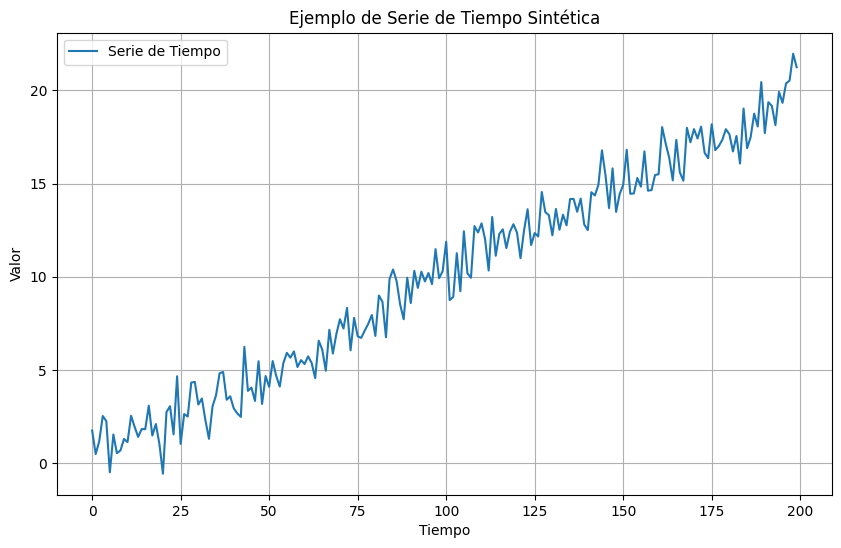

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 97.2747
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 50.6651
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 14.3316
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 16.4922
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9.1600
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.6008
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.4468
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.2576
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.8171
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.7111
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.6644
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.0871
Epoch 13/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.1702
Epoch 14/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.0486
Epoch 15/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.0894
Epoch 16/100
5/

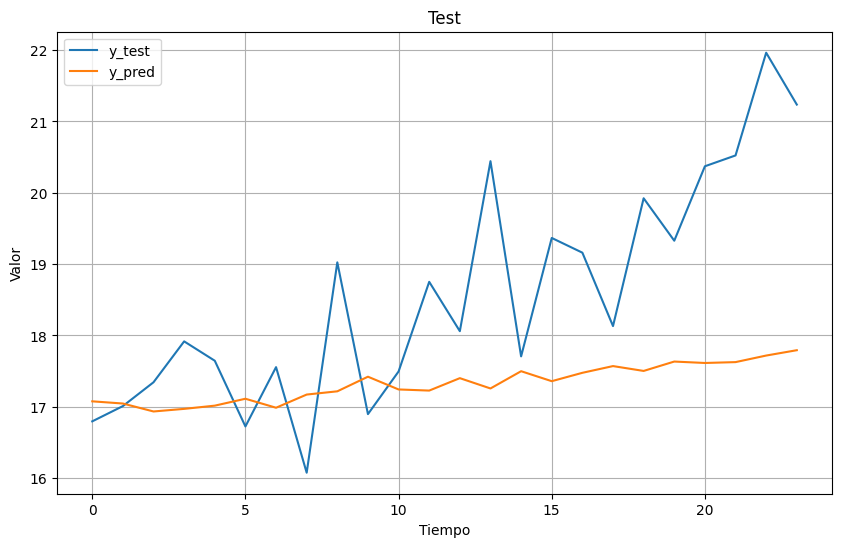

In [15]:
from keras.models import Sequential 
from keras.layers import LSTM, Dense 
import numpy as np
import matplotlib.pyplot as plt

# Generar datos para una serie de tiempo sintética
np.random.seed(0) # Fijar semilla para reproducibilidad
n_samples = 200 # Número de puntos de datos en la serie de tiempo 
t = np.arange(n_samples) # Valores de tiempo

# Crear una serie de tiempo sintética (en este caso, creciente) |
time_series = 0.1*t +np.random.randn(n_samples)


train_size = int(len(time_series) * 0.8) # Tamaño del conjunto de entrenamiento 
train_data, test_data = time_series[:train_size], time_series[train_size:] 


# Graficar la serie de tiempo
plt.figure(figsize=(10, 6))
plt.plot(t, time_series, label='Serie de Tiempo') 
plt.title('Ejemplo de Serie de Tiempo Sintética')
plt.xlabel('Tiempo')
plt.ylabel('Valor') 
plt.legend() 
plt.grid(True) 
plt.show()


# transformamos nuestros datos en secuencias 
def create_dataset(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length): 
        X.append(data[i:i + seq_length]) 
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Definimos el número de pasos de tiempo para la serie temporal 
seq_length = 16
# Creamos conjuntos de entrenamiento y prueba en formato 3D 
X_train, y_train = create_dataset(train_data, seq_length) 
X_test, y_test = create_dataset(test_data, seq_length)


# Construcción del modelo LSTM
model = Sequential()
model.add(LSTM(32,
                activation='relu',
                input_shape=(seq_length, 1), 
                return_sequences=True))
model.add(LSTM(32, activation='relu'))
model.add(Dense (1))


model.compile(optimizer='adam', loss='mse')


# Entrenamiento del modelo
model.fit(X_train, y_train, epochs=100)

# Evaluación del modelo |
Evaluación = model.evaluate(X_test, y_test)
print(Evaluación)


print("y_test: \n",y_test) 
# Predicción
y_pred = model.predict(X_test) 
print("y_pred: \n",y_pred)


# Graficar de la data de test vs pronostico la serie de tiempo 
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='y_test')
plt.plot(y_pred, label='y_pred')
plt.title('Test')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend() 
plt.grid(True) 
plt.show()

In [2]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.Collecting statsmodels
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.8 MB 656.4 kB/s eta 0:00:15
   -- ------------------------------------- 0.6/9.8 MB 4.4 MB/s eta 0:00:03
   ------ --------------------------------- 1.6/9.8 MB 8.6 MB/s eta 0:00:01
   ---------- ----------------------------- 2.5/9.8 MB 10.7 MB/s eta 0:00:01
   -------------- ------------------------- 3.5/9.8 MB 12.4 MB/s eta 0:00:01
   ------------------ --------------------- 4.5/9.8 MB 13.6 MB/s eta 0:00:01
   --------------------- ------------------ 5.4/9.8 MB 14.4 MB/s eta 0:00:01
   ------------------------- -------------- 6.3/9.8 MB 14.9 MB/s eta 0:00:01
   ----------------------------- ---------- 7.3/9.8 MB 15.5 MB/s eta 0:00:01
   ----------


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


c:\Users\jaime\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


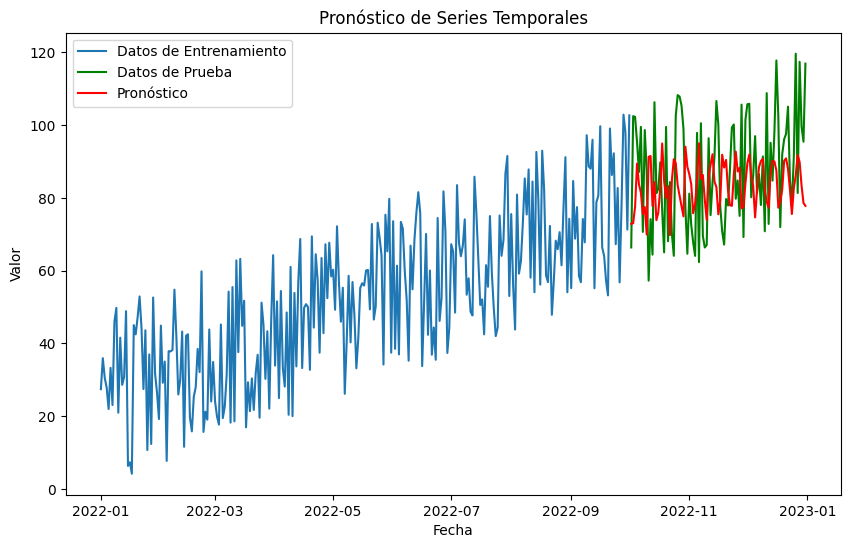

In [3]:

#L1 4 PRONOSTICO
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


# Generar datos de ejemplo
np.random.seed(0)
dates = pd.date_range(start='2022-01-01', end='2022-12-31')
values = np.arange(len(dates)) * 0.2 + np.random.rand(len(dates)) * 50 
ts = pd.Series(values, index=dates)


# Dividir los datos en entrenamiento y prueba
train_data = ts[:'2022-10-01']
test_data = ts['2022-10-02':]


# Ajustar el modelo ARIMA
model = ARIMA(train_data, order=(10, 1, 10)) 
model_fit = model.fit()

# Realizar el pronóstico
forecast = model_fit.forecast(steps=len(test_data))

# Gráfica de los datos originales y el pronóstico
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Datos de Entrenamiento')
plt.plot(test_data, label='Datos de Prueba', color='green') 
plt.plot(test_data.index, forecast, label='Pronóstico', color='red')
plt.legend()
plt.title('Pronóstico de Series Temporales')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.show()


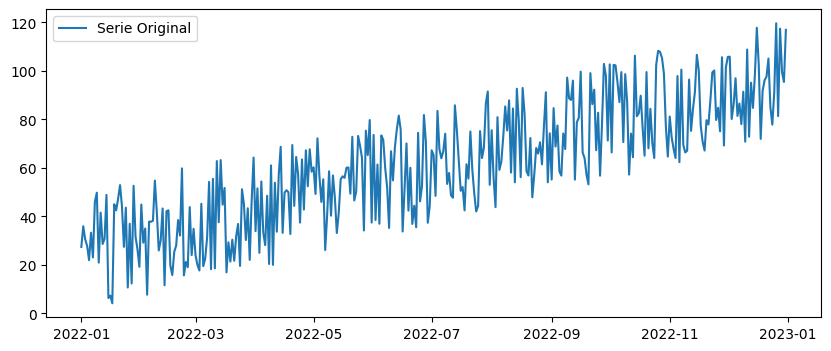

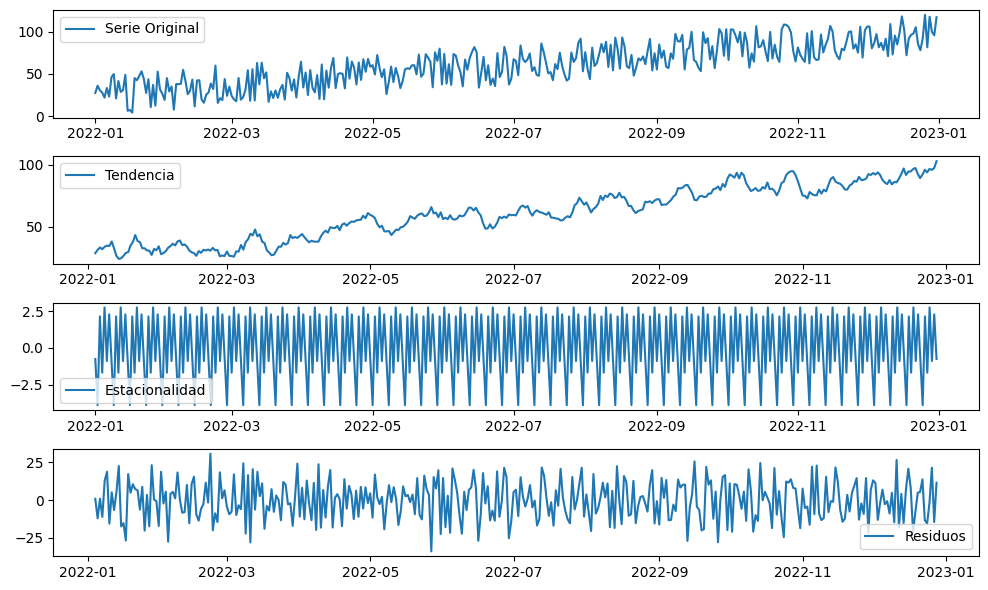

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


# Generar datos de ejemplo
np.random.seed(0)
dates = pd.date_range(start='2022-01-01', end='2022-12-31')
values = np.arange(len(dates)) * 0.2 + np.random.rand(len(dates)) * 50 
ts = pd.Series(values, index=dates)

# Gráfica de la serie original 
plt.figure(figsize=(10, 4))
plt.plot(ts, label='Serie Original')
plt.legend() 
plt.show()

# Descomposición de la serie de tiempo
decomposition = seasonal_decompose(ts, model='additive')


# Gráfica de la serie original 
plt.figure(figsize=(10, 6))
plt.subplot(411)
plt.plot(ts, label='Serie Original')
plt.legend()
# Gráfica de la tendencia
plt.subplot(412)
plt.plot(decomposition.trend, label='Tendencia')
plt.legend()
# Gráfica de la estacionalidad
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Estacionalidad')
plt.legend()
# Gráfica de los residuos
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuos')
plt.legend()
plt.tight_layout() 
plt.show()

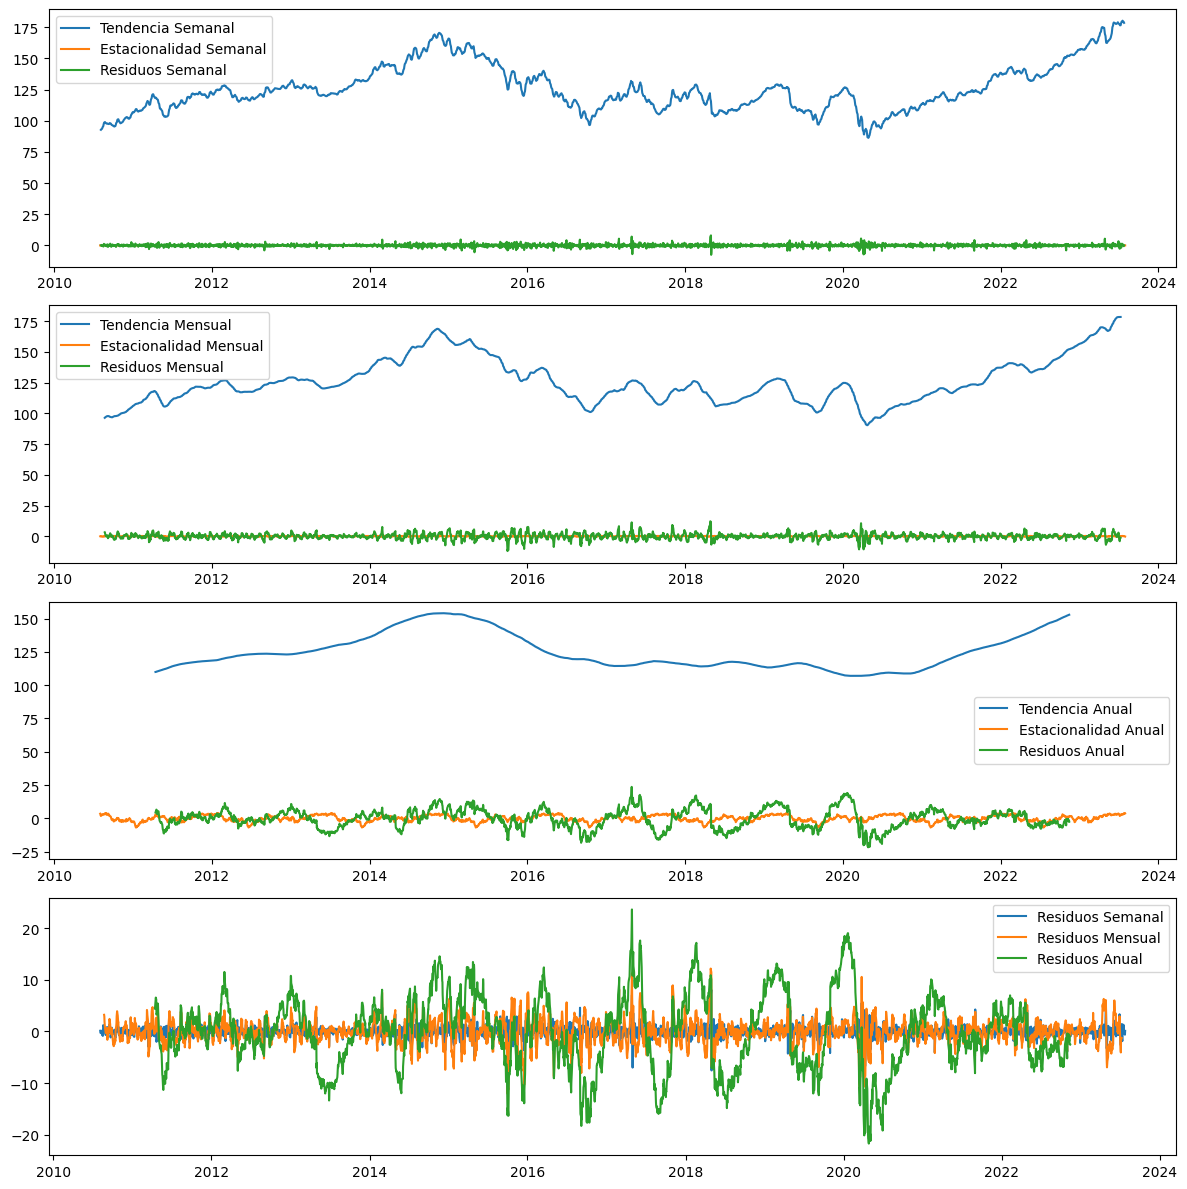

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Cargar el archivo CSV
file_path = 'ganado Datos.csv'
ganado_datos = pd.read_csv(file_path)

# Convertir la columna 'Data' a formato de fecha
ganado_datos['Data'] = pd.to_datetime(ganado_datos['Data'], format='%d.%m.%Y')

# Reemplazar comas por puntos en la columna 'Último' y convertir a float
ganado_datos['Último'] = ganado_datos['Último'].str.replace(',', '.').astype(float)

# Crear una serie temporal con la columna 'Último' como valores
ts = pd.Series(ganado_datos['Último'].values, index=ganado_datos['Data'])

# Descomposición semanal
decomposition_semanal = seasonal_decompose(ts, model='additive', period=7)

# Descomposición mensual
decomposition_mensual = seasonal_decompose(ts, model='additive', period=30)

# Descomposición anual
decomposition_anual = seasonal_decompose(ts, model='additive', period=365)

# Graficar los resultados

plt.figure(figsize=(12, 12))

# Componentes de la descomposición semanal
plt.subplot(411)
plt.plot(decomposition_semanal.trend, label='Tendencia Semanal')
plt.plot(decomposition_semanal.seasonal, label='Estacionalidad Semanal')
plt.plot(decomposition_semanal.resid, label='Residuos Semanal')
plt.legend()

# Componentes de la descomposición mensual
plt.subplot(412)
plt.plot(decomposition_mensual.trend, label='Tendencia Mensual')
plt.plot(decomposition_mensual.seasonal, label='Estacionalidad Mensual')
plt.plot(decomposition_mensual.resid, label='Residuos Mensual')
plt.legend()

# Componentes de la descomposición anual
plt.subplot(413)
plt.plot(decomposition_anual.trend, label='Tendencia Anual')
plt.plot(decomposition_anual.seasonal, label='Estacionalidad Anual')
plt.plot(decomposition_anual.resid, label='Residuos Anual')
plt.legend()

# Graficar todos los residuos juntos para comparación
plt.subplot(414)
plt.plot(decomposition_semanal.resid, label='Residuos Semanal')
plt.plot(decomposition_mensual.resid, label='Residuos Mensual')
plt.plot(decomposition_anual.resid, label='Residuos Anual')
plt.legend()

plt.tight_layout()
plt.show()




Epoch 1/10


c:\Users\jaime\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2639/2639 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 0.0045
Epoch 2/10
2639/2639 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 8.1676e-04
Epoch 3/10
2639/2639 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 5.3975e-04
Epoch 4/10
2639/2639 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 4.6454e-04
Epoch 5/10
2639/2639 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 5.2003e-04
Epoch 6/10
2639/2639 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 5.6508e-04
Epoch 7/10
2639/2639 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 3.7861e-04
Epoch 8/10
2639/2639 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 3.6462e-04
Epoch 9/10
2639/2639 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 3.7356e-04
Epoch 10/10
2639/2639 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 3.3811e-04
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


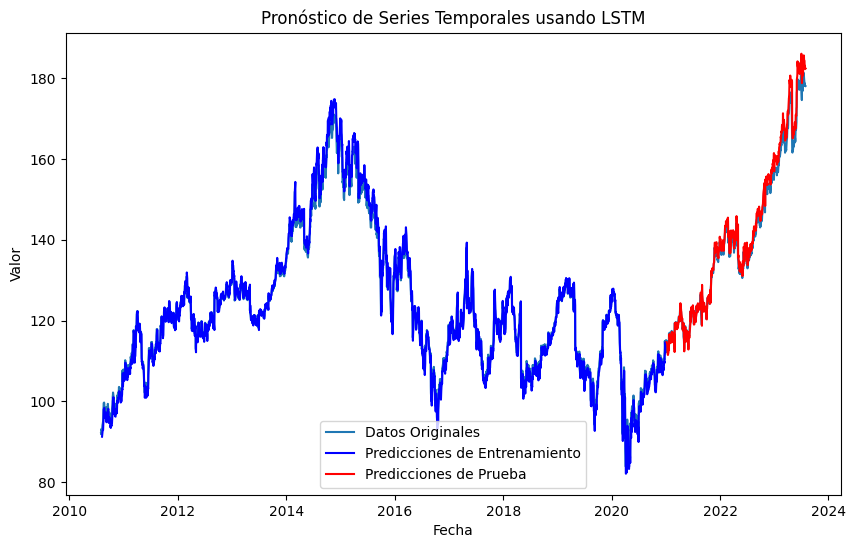

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Cargar los datos del CSV
df = pd.read_csv('Ganado Datos.csv', delimiter=',')  # Asegúrate de que el delimitador sea correcto

# Convertir la columna "Data" a formato de fecha con el formato correcto
df['Data'] = pd.to_datetime(df['Data'], format='%d.%m.%Y', errors='coerce')

# Establecer la columna "Data" como índice
df.set_index('Data', inplace=True)

# Convertir la columna "Último" a tipo numérico
df['Último'] = pd.to_numeric(df['Último'].str.replace(',', '.'), errors='coerce')

# Eliminar filas con valores nulos en la columna "Último"
df.dropna(subset=['Último'], inplace=True)

# Ordenar el índice cronológicamente
df = df.sort_index()

# Usar la columna "Último" para el análisis
ts = df['Último']

# Escalar los datos entre 0 y 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(ts.values.reshape(-1, 1))

# Dividir los datos en entrenamiento y prueba
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Crear el conjunto de datos para el modelo LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 5
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape input para LSTM [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Crear el modelo LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train, y_train, batch_size=1, epochs=10)

# Hacer predicciones
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invertir la normalización
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Gráfica de los datos originales y el pronóstico
train_plot = np.empty_like(scaled_data)
train_plot[:, :] = np.nan
train_plot[time_step:len(train_predict) + time_step, :] = train_predict

test_plot = np.empty_like(scaled_data)
test_plot[:, :] = np.nan
test_plot[len(train_predict) + (time_step * 2):len(test_predict) + len(train_predict) + (time_step * 2), :] = test_predict

plt.figure(figsize=(10, 6))
plt.plot(ts, label='Datos Originales')
plt.plot(pd.Series(train_plot.flatten(), index=ts.index), label='Predicciones de Entrenamiento', color='blue')
plt.plot(pd.Series(test_plot.flatten(), index=ts.index), label='Predicciones de Prueba', color='red')
plt.legend()
plt.title('Pronóstico de Series Temporales usando LSTM')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.show()



c:\Users\jaime\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jaime\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jaime\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jaime\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is ava

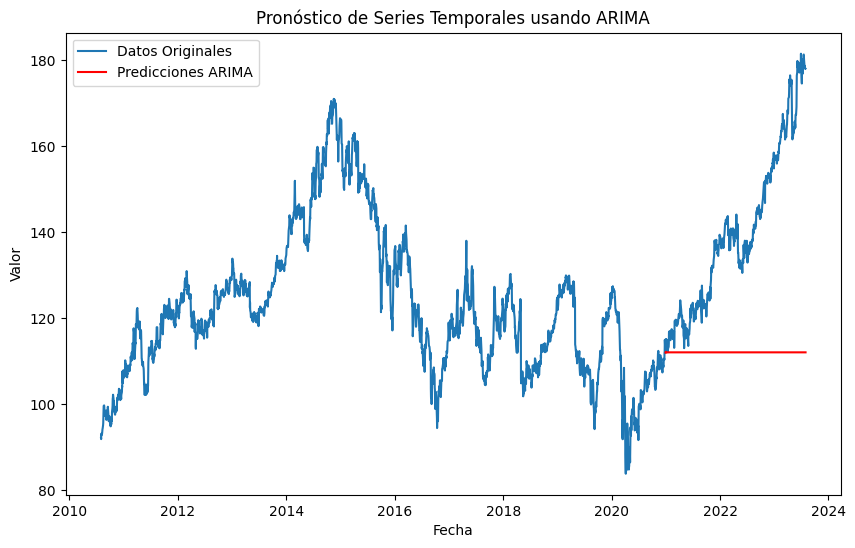

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Cargar los datos del CSV
df = pd.read_csv('Ganado Datos.csv', delimiter=',')  # Asegúrate de que el delimitador sea correcto

# Convertir la columna "Data" a formato de fecha con el formato correcto
df['Data'] = pd.to_datetime(df['Data'], format='%d.%m.%Y', errors='coerce')

# Establecer la columna "Data" como índice
df.set_index('Data', inplace=True)

# Convertir la columna "Último" a tipo numérico
df['Último'] = pd.to_numeric(df['Último'].str.replace(',', '.'), errors='coerce')

# Eliminar filas con valores nulos en la columna "Último"
df.dropna(subset=['Último'], inplace=True)

# Ordenar el índice cronológicamente
df = df.sort_index()

# Usar la columna "Último" para el análisis
ts = df['Último']

# Dividir los datos en entrenamiento y prueba
train_size = int(len(ts) * 0.8)
train_data = ts[:train_size]
test_data = ts[train_size:]

# Ajustar el modelo ARIMA
model = ARIMA(train_data, order=(5, 1, 0))  # Puedes ajustar los parámetros (p, d, q) según sea necesario
model_fit = model.fit()

# Hacer predicciones
forecast = model_fit.forecast(steps=len(test_data))
forecast_index = test_data.index

# Gráfica de los datos originales y el pronóstico
plt.figure(figsize=(10, 6))
plt.plot(ts, label='Datos Originales')
plt.plot(test_data.index, forecast, label='Predicciones ARIMA', color='red')
plt.legend()
plt.title('Pronóstico de Series Temporales usando ARIMA')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.show()


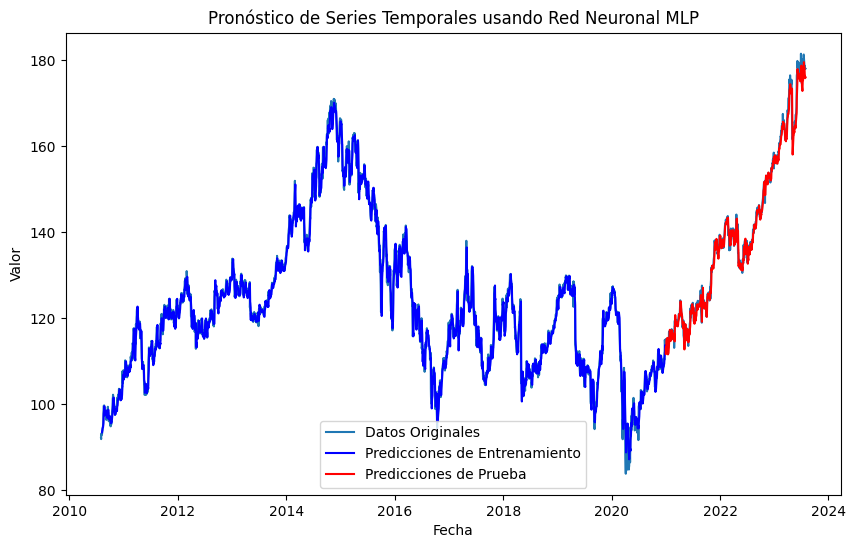

MSE en entrenamiento: 3.091560690702137
MSE en prueba: 2.5182028309393942


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor

# Cargar los datos del CSV
df = pd.read_csv('Ganado Datos.csv', delimiter=',')  # Asegúrate de que el delimitador sea correcto

# Convertir la columna "Data" a formato de fecha con el formato correcto
df['Data'] = pd.to_datetime(df['Data'], format='%d.%m.%Y', errors='coerce')

# Establecer la columna "Data" como índice
df.set_index('Data', inplace=True)

# Convertir la columna "Último" a tipo numérico
df['Último'] = pd.to_numeric(df['Último'].str.replace(',', '.'), errors='coerce')

# Eliminar filas con valores nulos en la columna "Último"
df.dropna(subset=['Último'], inplace=True)

# Ordenar el índice cronológicamente
df = df.sort_index()

# Usar la columna "Último" para el análisis
ts = df['Último']

# Escalar los datos entre 0 y 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(ts.values.reshape(-1, 1))

# Crear el conjunto de datos para el modelo
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 5
X, y = create_dataset(scaled_data, time_step)

# Dividir en conjunto de entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Crear el modelo MLP
model = MLPRegressor(hidden_layer_sizes=(50, 50), activation='relu', solver='adam', max_iter=100, random_state=1)

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invertir la normalización
train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Ajustar los índices para la gráfica
def get_plot_indices(start_index, length, time_step, total_length):
    return np.arange(start_index + time_step, start_index + length)

# Gráfica de los datos originales y el pronóstico
plt.figure(figsize=(10, 6))

# Datos originales
plt.plot(ts.index, scaler.inverse_transform(scaled_data).flatten(), label='Datos Originales')

# Datos de entrenamiento
train_index = ts.index[time_step:time_step + len(X_train)]
plt.plot(train_index, train_predict.flatten(), label='Predicciones de Entrenamiento', color='blue')

# Datos de prueba
test_index = ts.index[len(X_train) + time_step:len(X_train) + time_step + len(X_test)]
plt.plot(test_index, test_predict.flatten(), label='Predicciones de Prueba', color='red')

plt.legend()
plt.title('Pronóstico de Series Temporales usando Red Neuronal MLP')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.show()

# Evaluar el modelo
print(f'MSE en entrenamiento: {mean_squared_error(y_train, train_predict)}')
print(f'MSE en prueba: {mean_squared_error(y_test, test_predict)}')





